

>  ## ***`Task 3: Implement K-Nearest Neighbors (KNN) Classifier`*** ##

---
```Description:```

`Build a KNN classifier to classify data points into categories.`



---
```Objectives:```

```
1. Train a KNN model on a labeled dataset.
2. Evaluate the performance using accuracy, confusion matrix, and precision/recall.
3. Use different values of K and compare the results.
```

---

`Tools: Python, scikit-learn, pandas.`

`Using Iris dataset.`

### ***1- Import pre-processing libs*** ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


### ***2- Import and Load Data*** ###

In [2]:
df = pd.read_csv(r'D:\Abdelraouf\Quran\Codveda-ML-Internship\DataSet-For-Tasks\1_iris.csv')

### ***3- Exploring Data*** ###

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 3


### ***4- Data Preprocessing*** ###

In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### ***5- Train and Evaluate KNN Model*** ###

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results.append({'k': k, 'accuracy': accuracy, 'precision': precision, 'recall': recall})

    if k == 5:
        print("\nClassification Report for K=5:")
        print(classification_report(y_test, y_pred, target_names=df['species'].unique()))

results_df = pd.DataFrame(results)
print("Results for different K values:")
print(results_df)


Classification Report for K=5:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Results for different K values:
    k  accuracy  precision  recall
0   1       1.0        1.0     1.0
1   3       1.0        1.0     1.0
2   5       1.0        1.0     1.0
3   7       1.0        1.0     1.0
4   9       1.0        1.0     1.0
5  11       1.0        1.0     1.0
6  13       1.0        1.0     1.0
7  15       1.0        1.0     1.0


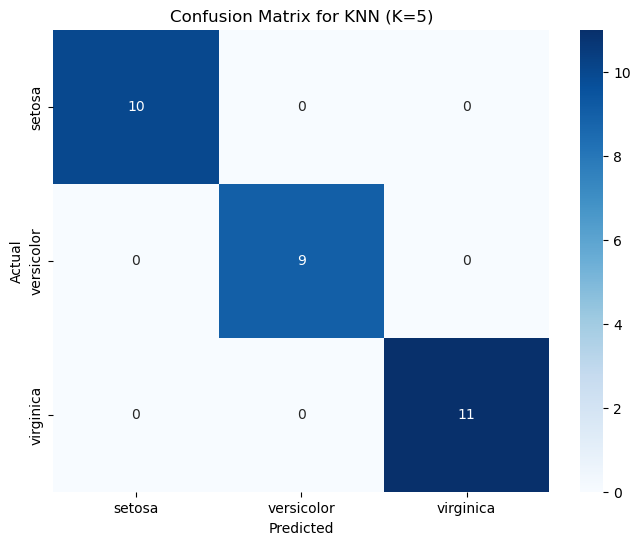

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title('Confusion Matrix for KNN (K=5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ***6- Visualize Performance Metrics*** ###

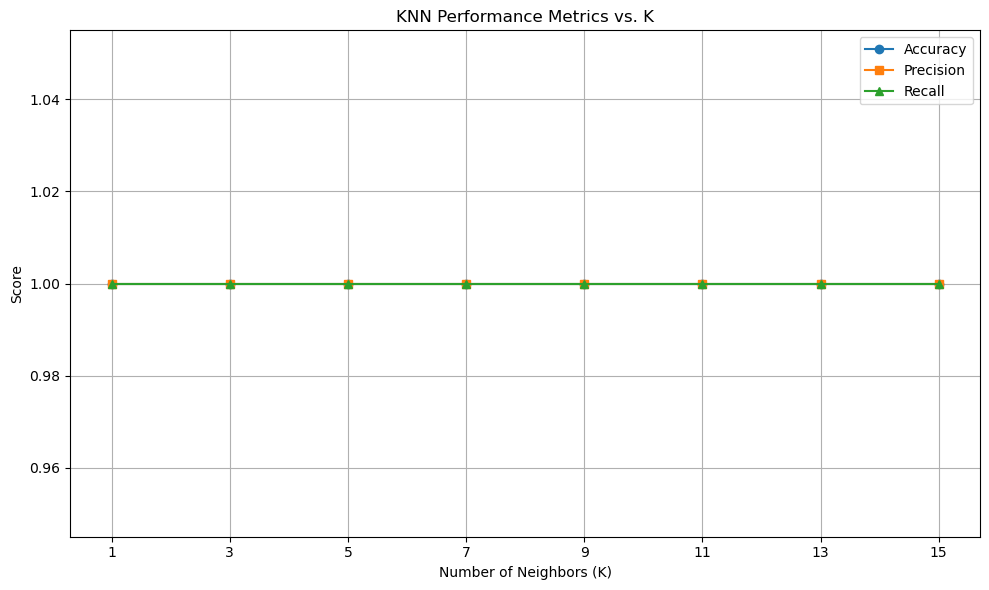

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['k'], results_df['precision'], marker='s', label='Precision')
plt.plot(results_df['k'], results_df['recall'], marker='^', label='Recall')
plt.title('KNN Performance Metrics vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ***`Conclusion`*** ##

**In this notebook, we successfully implemented a K-Nearest Neighbors (KNN) classifier using the Iris dataset. The main steps included:**

---

```
1. Loaded and explored the Iris dataset, checking for missing and duplicate values.
2. Selected relevant features and the target variable for classification.
3. Split the data into training and testing sets to evaluate model performance.
4. Scaled the features to ensure fair distance calculations for KNN.
5. Trained a KNN classifier using scikit-learn and evaluated it using accuracy, precision, recall, and F1-score.
6. Visualized the confusion matrix to interpret classification results.
7. Compared model performance for different values of K and visualized the results.
```

---

**These steps ensured the data was clean and suitable for classification, and allowed us to assess the effectiveness of the KNN algorithm for multi-class classification tasks. The results show high performance across different K values, with K=5 providing a good balance of accuracy, precision, and recall.**